# **Ex1 - Unsupervised learning**

## Names and IDs

1.   212112106, Abed Shogan
2.   209969245, Noam Shani

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [28]:
# load the data
# Provide the path to your Excel file
path = 'C:\\Users\\user\\Dropbox\\Semester E\\Machine Learning\\HW\\HW1_ML\\customer_segmentation.csv'
# a = 5
# # Load data into a DataFrame
data_frame = pd.read_csv(path)
# Get the size of the DataFrame
rows, columns = data_frame.shape

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


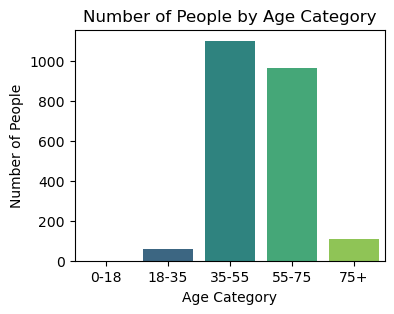

In [29]:
# print(a)
current_year = 2024
data_frame['age'] = current_year - data_frame['Year_Birth']

    # Define age categories
bins = [0, 18, 35, 55, 75, data_frame['age'].max()]
labels = ['0-18', '18-35', '35-55', '55-75', '75+']

    # Add a new column for age category
data_frame['age_category'] = pd.cut(data_frame['age'], bins=bins, labels=labels, right=False)

    # Create a bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x='age_category', data=data_frame, palette='viridis')
plt.title('Number of People by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.show()

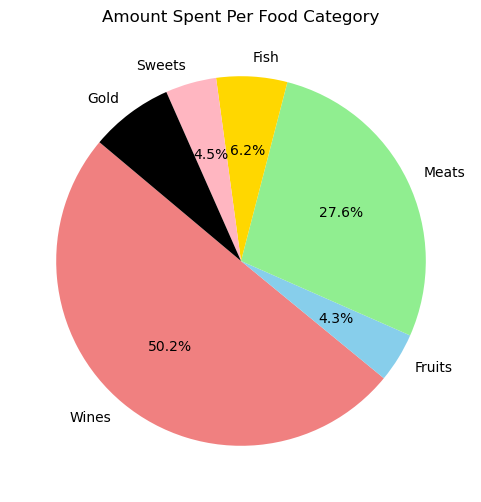

In [30]:
# Graph 2 -     #Sum the amounts for each food category across all customers
category_totals = data_frame[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum()

#dictionary to map original category names to custom labels
category_labels = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntFishProducts': 'Fish',
    'MntMeatProducts': 'Meats',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
    }

    #Map original category names to my labels
custom_labels = [category_labels.get(category, category) for category in category_totals.index]

    # Plot a pie chart with custom labels
plt.figure(figsize=(6, 6))
plt.pie(category_totals, labels=custom_labels, autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'skyblue', 'lightgreen', 'gold', 'lightpink','black'])
plt.title('Amount Spent Per Food Category')
plt.show()


**Insight** -  The Insight we can take from Graph 1 is that most Customers are between the Ages of 35 and 75, We have Some elderly over the age of 75 and some who are young (18 to 35) We Also do not have under age Customers.

**Insight** - In Graph 2  we can understand that the most amount of money spent by customers is on Wines, Above 50% of all spendings!, After that comes in Meat products and lastly are Fish Products, which customers spend the least on.
We can see the Distributions of Ratios in This Pie Chart.

AttributeError: 'int' object has no attribute 'startswith'

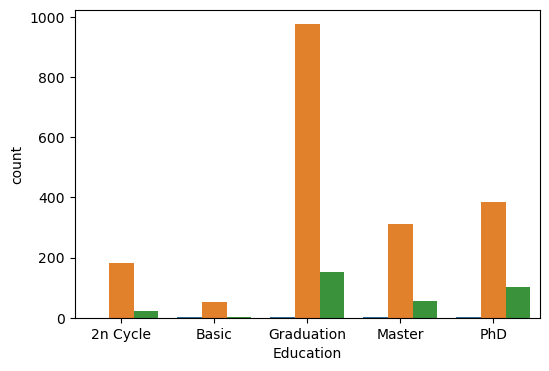

In [31]:
# Graph 3 -      # Group the data by education level and calculate the counts of responders and non-responders
education_counts = data_frame.groupby(['Education', 'Response']).size().unstack().fillna(0)

        # Reset the index to make 'Education' and 'Response' regular columns
education_counts = education_counts.reset_index()

        # Melt the DataFrame
melted_data = pd.melt(education_counts, id_vars='Education', var_name='Response', value_name='Count')
        # Plot a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='count', hue='Response',
                data=education_counts.reset_index().melt(id_vars=['Education'], var_name='Response',
                                                            value_name='count'))
plt.title('Responder Distribution by Education Level')
plt.legend(title='Response', labels=['Non-Responder - Orange', 'Responder - Blue'])
plt.xlabel('Education ')
plt.ylabel('Amount Responded')
plt.show()


**Insight** - Graph 3: We can perceive from Graph 3 that the most prevalent level of education is "Graduation" level and the least one is "Basic", The No-Response:Response Ratio of all Levels is very high, meaning that most people DO NOT respond 
Orange - No Response
Green - Response

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [31]:
# load the data
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
import pandas as pd
# Provide the path to your Excel file
path = 'C:\\Users\\user\\Dropbox\\Semester E\\Machine Learning\\HW\\HW1_ML\\customer_segmentation.csv'
# # Load data into a DataFrame
data_frame_2 = pd.read_csv(path)
# Get the size of the DataFrame
rows, columns = data_frame_2.shape


In [32]:
# Scale the data using MinMaxScaler, 
#Year_Birth, Income, Recency,Nums and Mnts
min_max_scaler = MinMaxScaler()
numerical_columns = [ 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumCatalogPurchases', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
non_numerical_columns = [col for col in data_frame_2.columns if col not in numerical_columns]

# Separate the data into numerical and non-numerical DataFrames
numerical_data = data_frame_2[numerical_columns]
non_numerical_data = data_frame_2[non_numerical_columns]

# Scale the numerical data using MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(min_max_scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Concatenate the scaled numerical data with the non-numerical data
scaled_data_frame_2 = pd.concat([non_numerical_data, scaled_numerical_data], axis=1)

print("Original Data:")
print(data_frame_2.head())
print("\nScaled Data:")
print(scaled_data_frame_2.head())


# Encode categorical variables
##Education, Marital Status, CAMPAGAINS, etc
categorical_vars = ['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']

encoder = OneHotEncoder()
categorical_data = data_frame_2[categorical_vars]
# Fit and transform the categorical data
encoded_categorical_data = encoder.fit_transform(categorical_data)
print("Encoded variables: \n")
print(encoded_categorical_data)

# Create a DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_categorical_data)

# Concatenate the encoded categorical variables with the scaled data
final_data = pd.concat([scaled_data_frame_2, encoded_df], axis=1)

# Display the final DataFrame
print("Final Data:")
print(final_data.head())

#The notation (i, j) 1.0 means that for the i-th row, the j-th category is present.

Original Data:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


In [33]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

# Visualize the clusters


### Elbow

### Silhouette Score

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





In [34]:
# Adjust n_components as needed


# Create a DataFrame with the principal components



# Plotting the PCA


# Display explained variance


**Q**: What is the variance explained in the 2 component PCA?

**A**:

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





### Elbow

### Silhouette

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}